<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> VDOEST </font>
</div>

<div align="center"> 
<font size=5> Fabricación de metasuperficies en clur </font>
</div>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from py_aocg.dxf_contour import DXF_mask_contour
from py_aocg.dxf_contour import mm, um, nm, inches

In [4]:
dxf_params = dict(

version="R2000",
total_size=4*inches,
num_masks=(4, 4),
line_size=0.5*um,
)

# Angela's data

In [5]:
mask_size = 600*um
period = 5 * um
min_feature = 50*nm
max_feature = 0.9 * period


In [6]:
data = np.load("data_to_dxf_123um.npz")

In [7]:
for key in data.keys():
    print(key)

x
y
w_x
w_y
theta


# Load data in desired format

In [8]:
x = data['x'].flatten()
y = data['y'].flatten()
w_x = data['w_x'].flatten()
w_y = data['w_y'].flatten()
theta = data['theta'].flatten()

print(len(x))

65536


In [9]:
print(x.min(), y.min(), w_x.min(), w_y.min(), theta.min())
print(x.max(), y.max(), w_x.max(), w_y.max(), theta.max())

-61.44 -61.44 0.05 0.05 -0.7853981633974484
61.44 61.44 0.25 0.25 2.356194490192345


In [10]:
cutting_dict = dict(
                    r0 = (0,0),
                    type = 'circular',
                    size = 1*mm,
                    )

# Generate mask

In [11]:
mask = DXF_mask_contour(filename="240228 isom 2 - angela contour", cutting_dict=cutting_dict)


In [12]:
for i in range(len(x)):
    r0 = (x[i],y[i])
    size_square =(w_x[i], w_y[i])
    angle = theta[i]
    mask.rectangle(r0=r0, size= size_square, angle =angle, origin='0')


In [13]:
mask.save(verbose=True)

filename = 240228 isom 2 - angela contour.dxf


240228 isom 2 - angela contour.png


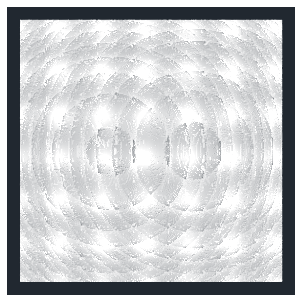

In [14]:
mask.draw()